In [3]:

# Librerías para tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sys
sys.path.append("../")
from src import soporte

import dotenv
from dotenv import load_dotenv
import os

In [4]:
load_dotenv()
rapidapi_token = os.getenv("token")

In [6]:
#Usaremos la API de BOOKING para una familia

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"children_ages":"12,12","page_number":"0","adults_number":"2","children_number":"2","room_number":"2","include_adjacency":"true","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-390625","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_fam_hmadrid = (response.json())


                                               Nombre Puntuación Reseña  \
0                                Gran View Apartments           Superbe   
1                     Aspasios Calle Mayor Apartments           Superbe   
2        Palacio Tirso de Molina - THE ARC COLLECTION          Fabuleux   
3                                        Axor Barajas           Superbe   
4                                  Elba Madrid Alcalá           Superbe   
5                                   Wonder Apartments         Très bien   
6      Eric Vökel Boutique Apartments - Atocha Suites          Fabuleux   
7                   SLEEP'N Atocha - B Corp Certified           Superbe   
8       Casa de las Artes, member of Meliá Collection           Superbe   
9                                          Axor Feria         Très bien   
10                               Ilunion Alcalá Norte           Superbe   
11                       Home Art Apartments Chamberí         Très bien   
12                       

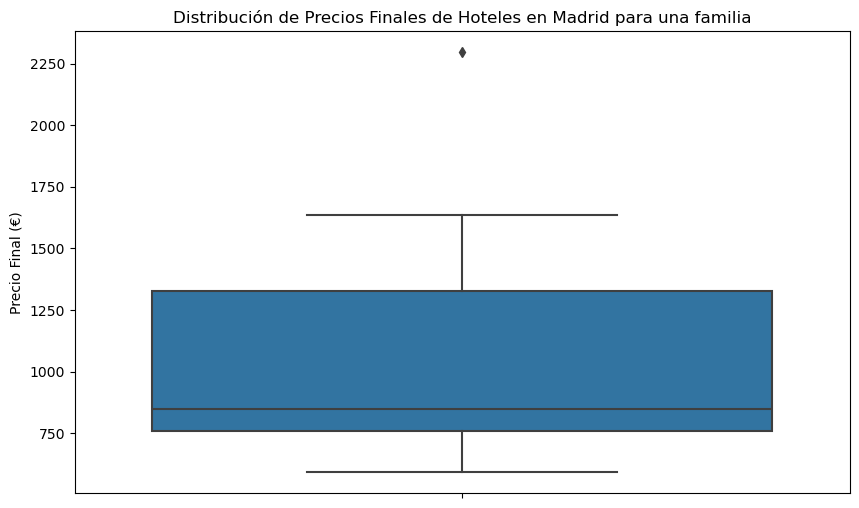

In [12]:


# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_fam_hmadrid['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en Madrid para una familia')
plt.show()



In [9]:
#Para una pareja
#Usaremos la API de BOOKING para una pareja

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"2","room_number":"1","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-390625","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_pareja_madrid = (response.json())


                                          Nombre Puntuación Reseña  \
0   Palacio Tirso de Molina - THE ARC COLLECTION          Fabuleux   
1                             Elba Madrid Alcalá           Superbe   
2                                 Hostal Adriano         Très bien   
3                                 Ilunion Atrium         Très bien   
4                           Ilunion Alcalá Norte           Superbe   
5                         Hotel 4C Puerta Europa              Bien   
6                          Crisol Vía Castellana         Très bien   
7                               Catalonia Atocha           Superbe   
8                              Hostal La Selecta           Superbe   
9                                Ilunion Pio XII         Très bien   
10                         Ilunion Suites Madrid           Superbe   
11             SLEEP'N Atocha - B Corp Certified           Superbe   
12                         Catalonia Plaza Mayor          Fabuleux   
13                  

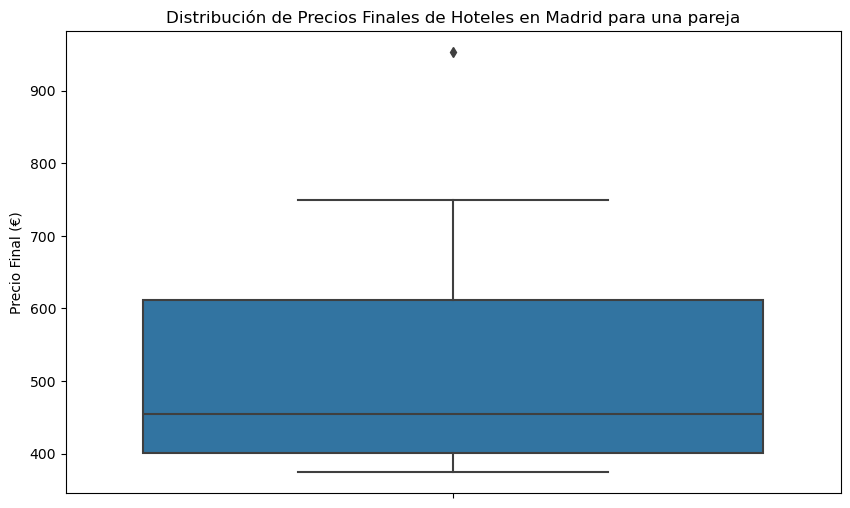

In [11]:


# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_pareja_madrid['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en Madrid para una pareja')
plt.show()



In [13]:
#Usaremos la API de BOOKING para un grupo de amigos
#Como son 5, cogeremos dos habitaciones que no tienen por qué ser adyacentes

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"5","room_number":"2","include_adjacency":"false","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-390625","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_amigos_madrid = (response.json())


                                               Nombre Puntuación Reseña  \
0                                        Axor Barajas           Superbe   
1                                          Axor Feria         Très bien   
2      Eric Vökel Boutique Apartments - Madrid Suites          Fabuleux   
3                       Valdevebas Chalet con Piscina          Fabuleux   
4                                     Senator Barajas              Bien   
5                                  Elba Madrid Alcalá           Superbe   
6                          Feelathome Goya Apartments           Superbe   
7                                   Dobo Homes - H135      Exceptionnel   
8     Acogedor apartamento en calle Alcalá by beBalmy         Très bien   
9                                      Hostal Adriano         Très bien   
10          Lujoso apartamento en Chamberí by beBalmy           Superbe   
11                       Home Art Apartments Chamberí         Très bien   
12                       

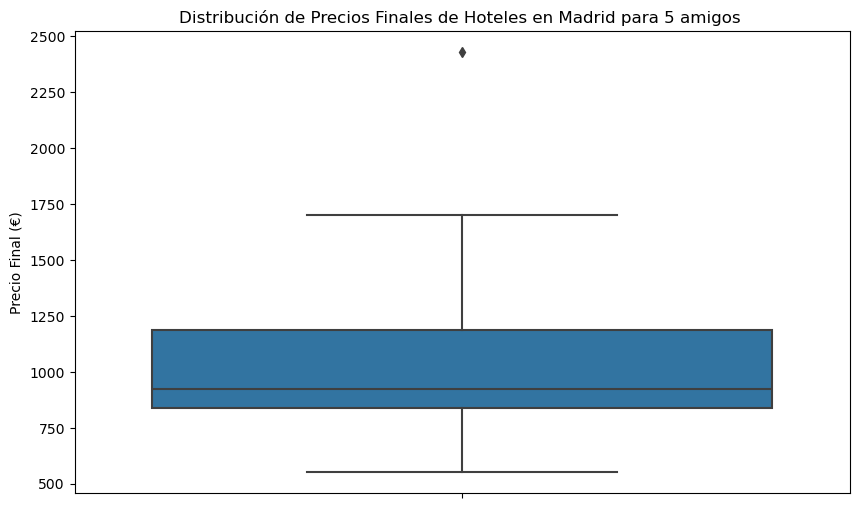

In [15]:


# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_amigos_madrid['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en Madrid para 5 amigos ')
plt.show()



In [17]:
#Para un viajero aventurero


# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"1","room_number":"1","include_adjacency":"false","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-390625","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_aventurero_madrid = (response.json())

                                          Nombre Puntuación Reseña  \
0   Palacio Tirso de Molina - THE ARC COLLECTION          Fabuleux   
1                             Elba Madrid Alcalá           Superbe   
2                             Hotel Nuevo Boston         Très bien   
3                        Veracruz Puerta del Sol         Très bien   
4                         Hotel 4C Puerta Europa              Bien   
5                           Ilunion Alcalá Norte           Superbe   
6                                  Hotel Liabeny          Fabuleux   
7                                 Ilunion Atrium         Très bien   
8                    Hotel Princesa Plaza Madrid         Très bien   
9                                 Catalonia Goya           Superbe   
10                                  Hotel Regina          Fabuleux   
11                              Catalonia Atocha           Superbe   
12                          Zenit Conde de Orgaz           Superbe   
13                  

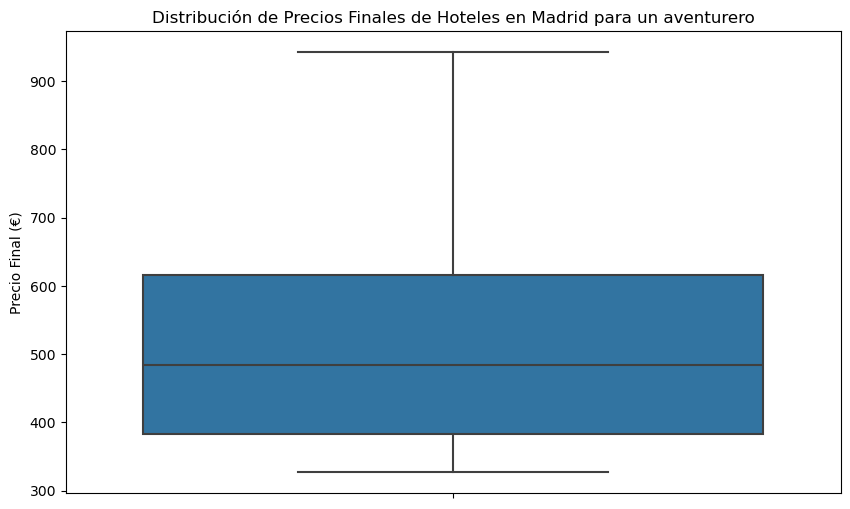

In [19]:


# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_aventurero_madrid['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en Madrid para un aventurero')
plt.show()

